# Classification for ODFM Dataset

This notebook uses ODFM dataset for training customized EffiecientNet models. the dataset consists of 120K samples for 12 classes to be classifed, so there are 10K samples for each class


### Importing libraries


In [1]:
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b0, efficientnet_b2
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch import optim
from tqdm import tqdm
import torch.nn.functional as F
import torchsig.transforms as ST
import numpy as np
import torchsig
import os
import shutil
from torch.utils.data import Subset
from Train_evaluate import *
from sigODFM import Sig53
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from torch import nn, optim


----
### Data Reading


In [2]:
selected_classes= [
        "ofdm-64",
        "ofdm-72",
        "ofdm-128",
        "ofdm-180",
        "ofdm-256",
        "ofdm-300",
        "ofdm-512",
        "ofdm-600",
        "ofdm-900",
        "ofdm-1024",
        "ofdm-1200",
        "ofdm-2048",
    ]

In [ ]:
# Specify Sig53 Options
root = "../../../../data/torchsig/ODFM/"
train = False
impaired = False
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)

# Instantiate the Sig53 Clean Training Dataset
sig53_clean_train = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_train))
data, label = sig53_clean_train[idx]
print("Dataset length: {}".format(len(sig53_clean_train)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

----
### Dataloaders

In [6]:
# Calculate the size of the validation set (10% of the training set)
val_size = int(0.1 * len(sig53_clean_train))
train_size = len(sig53_clean_train) - val_size

# Split the training dataset into training and validation datasets
train_dataset, val_dataset = torch.utils.data.random_split(sig53_clean_train, [train_size, val_size])

# Create data loaders for training, validation, and testing
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=True,
    drop_last=True,
)
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

----
### Call and Train Model
Loading the model structure to be trained

#### EffieicentNet B0

In [8]:
model = efficientnet_b0(
    pretrained=False,
    path="efficientnet_b0.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
from torch import nn, optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 20

In [24]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)

Epoch 1/20


Training: 100%|██████████| 6750/6750 [05:40<00:00, 19.83it/s, loss=1.4478, accuracy=41.46%]


Saved new best checkpoint.
Epoch 1: Train Loss 1.4474, Acc 41.46%, Val Loss 1.0742, Val Acc 56.89%
Epoch 2/20


Training: 100%|██████████| 6750/6750 [05:41<00:00, 19.79it/s, loss=1.0982, accuracy=55.49%]


Saved new best checkpoint.
Epoch 2: Train Loss 1.0982, Acc 55.49%, Val Loss 0.9452, Val Acc 61.61%
Epoch 3/20


Training: 100%|██████████| 6750/6750 [05:40<00:00, 19.80it/s, loss=0.9864, accuracy=60.04%]


Epoch 3: Train Loss 0.9864, Acc 60.04%, Val Loss 1.3143, Val Acc 52.47%
Epoch 4/20


Training: 100%|██████████| 6750/6750 [05:42<00:00, 19.71it/s, loss=0.5006, accuracy=78.28%]


Saved new best checkpoint.
Epoch 4: Train Loss 0.5005, Acc 78.28%, Val Loss 0.3660, Val Acc 83.64%
Epoch 5/20


Training: 100%|██████████| 6750/6750 [05:41<00:00, 19.74it/s, loss=0.3651, accuracy=84.32%]


Saved new best checkpoint.
Epoch 5: Train Loss 0.3651, Acc 84.32%, Val Loss 0.3479, Val Acc 84.87%
Epoch 6/20


Training: 100%|██████████| 6750/6750 [05:42<00:00, 19.71it/s, loss=0.3070, accuracy=86.84%]


Epoch 6: Train Loss 0.3070, Acc 86.84%, Val Loss 0.4707, Val Acc 80.78%
Epoch 7/20


Training: 100%|██████████| 6750/6750 [05:40<00:00, 19.82it/s, loss=0.2786, accuracy=88.03%]


Saved new best checkpoint.
Epoch 7: Train Loss 0.2786, Acc 88.03%, Val Loss 0.2403, Val Acc 90.12%
Epoch 8/20


Training: 100%|██████████| 6750/6750 [05:43<00:00, 19.67it/s, loss=0.2503, accuracy=89.38%]


Epoch 8: Train Loss 0.2503, Acc 89.38%, Val Loss 1.8821, Val Acc 57.70%
Epoch 9/20


Training: 100%|██████████| 6750/6750 [05:43<00:00, 19.63it/s, loss=0.2333, accuracy=90.11%]


Epoch 9: Train Loss 0.2333, Acc 90.11%, Val Loss 0.4008, Val Acc 85.42%
Epoch 10/20


Training: 100%|██████████| 6750/6750 [05:43<00:00, 19.67it/s, loss=0.2211, accuracy=90.61%]
                                                                                                   

Epoch 10: Train Loss 0.2211, Acc 90.61%, Val Loss 0.2919, Val Acc 87.74%
Stopping early due to no improvement in validation accuracy.


----
### Evaluation

Validation Loss: 0.2919
Validation Accuracy: 87.74%


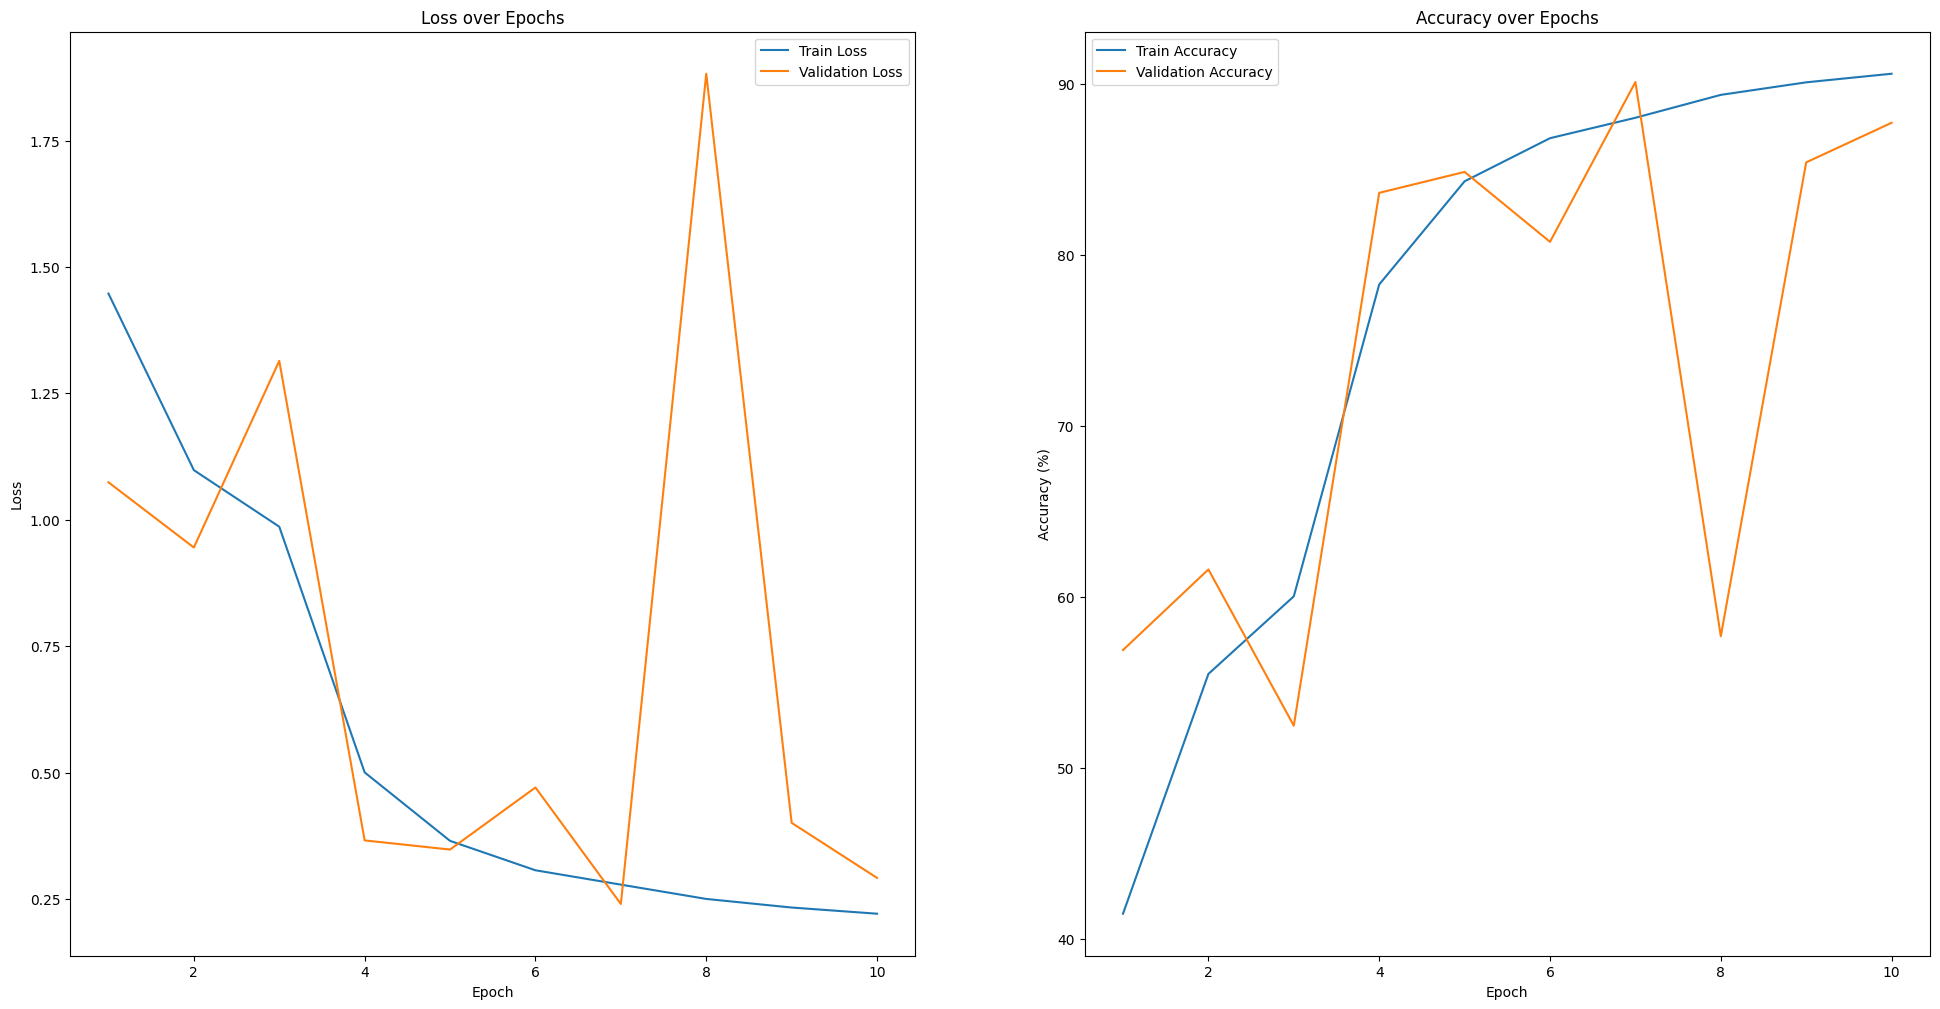

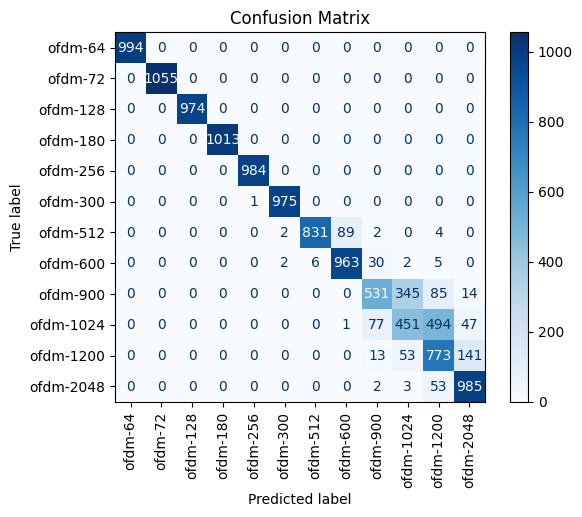

In [26]:
val_loss, val_accuracy, labels, predictions = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.2f}%")

plot_metrics_and_confusion_matrix(trainer, labels, predictions,selected_classes)

In [27]:

report = classification_report(labels, predictions, target_names=selected_classes)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     ofdm-64       1.00      1.00      1.00       994
     ofdm-72       1.00      1.00      1.00      1055
    ofdm-128       1.00      1.00      1.00       974
    ofdm-180       1.00      1.00      1.00      1013
    ofdm-256       1.00      1.00      1.00       984
    ofdm-300       1.00      1.00      1.00       976
    ofdm-512       0.99      0.90      0.94       928
    ofdm-600       0.91      0.96      0.93      1008
    ofdm-900       0.81      0.54      0.65       975
   ofdm-1024       0.53      0.42      0.47      1070
   ofdm-1200       0.55      0.79      0.65       980
   ofdm-2048       0.83      0.94      0.88      1043

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.87     12000



Even though the model performance is good, but still not enough to be used as the accuracy is less than 90%.

Anyway, we can see that the model can successfully differentiate between almost all ODFM class except for ODFM 900, ODFM 1024 and ODFM 1200

Next step is to expirement with b2 version of the model

#### EfficientNet B2

In [10]:
model = efficientnet_b2(
    pretrained=False,
    path="efficientnet_b2.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20

In [12]:
trainer = ModelTrainer(model, train_dataloader, val_dataloader, criterion, optimizer, device)
trainer.run_training_loop(num_epochs)

Epoch 1/20


Training: 100%|██████████| 6750/6750 [08:06<00:00, 13.88it/s, loss=1.5393, accuracy=39.69%]


Saved new best checkpoint.
Epoch 1: Train Loss 1.5393, Acc 39.69%, Val Loss 0.8927, Val Acc 62.98%
Epoch 2/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.33it/s, loss=0.9289, accuracy=61.39%]


Saved new best checkpoint.
Epoch 2: Train Loss 0.9289, Acc 61.39%, Val Loss 0.7722, Val Acc 68.10%
Epoch 3/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.31it/s, loss=0.8299, accuracy=65.43%]


Saved new best checkpoint.
Epoch 3: Train Loss 0.8299, Acc 65.43%, Val Loss 0.7259, Val Acc 68.94%
Epoch 4/20


Training: 100%|██████████| 6750/6750 [08:27<00:00, 13.30it/s, loss=0.7353, accuracy=68.96%]


Saved new best checkpoint.
Epoch 4: Train Loss 0.7353, Acc 68.96%, Val Loss 0.4932, Val Acc 78.26%
Epoch 5/20


Training: 100%|██████████| 6750/6750 [08:27<00:00, 13.29it/s, loss=0.4131, accuracy=81.31%]


Saved new best checkpoint.
Epoch 5: Train Loss 0.4131, Acc 81.31%, Val Loss 0.3235, Val Acc 85.22%
Epoch 6/20


Training: 100%|██████████| 6750/6750 [08:27<00:00, 13.30it/s, loss=0.3052, accuracy=86.42%]


Saved new best checkpoint.
Epoch 6: Train Loss 0.3052, Acc 86.42%, Val Loss 0.3091, Val Acc 85.84%
Epoch 7/20


Training: 100%|██████████| 6750/6750 [08:27<00:00, 13.31it/s, loss=0.2575, accuracy=88.69%]


Saved new best checkpoint.
Epoch 7: Train Loss 0.2575, Acc 88.69%, Val Loss 0.2034, Val Acc 90.69%
Epoch 8/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.33it/s, loss=0.2274, accuracy=90.22%]


Epoch 8: Train Loss 0.2274, Acc 90.22%, Val Loss 0.2397, Val Acc 89.09%
Epoch 9/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.33it/s, loss=0.2026, accuracy=91.30%]


Saved new best checkpoint.
Epoch 9: Train Loss 0.2026, Acc 91.30%, Val Loss 0.1413, Val Acc 94.07%
Epoch 10/20


Training: 100%|██████████| 6750/6750 [08:28<00:00, 13.27it/s, loss=0.1849, accuracy=92.14%]


Epoch 10: Train Loss 0.1849, Acc 92.14%, Val Loss 0.3004, Val Acc 88.01%
Epoch 11/20


Training: 100%|██████████| 6750/6750 [08:48<00:00, 12.78it/s, loss=0.1669, accuracy=93.02%]


Saved new best checkpoint.
Epoch 11: Train Loss 0.1669, Acc 93.02%, Val Loss 0.1403, Val Acc 94.17%
Epoch 12/20


Training: 100%|██████████| 6750/6750 [09:02<00:00, 12.44it/s, loss=0.1541, accuracy=93.58%]


Epoch 12: Train Loss 0.1541, Acc 93.58%, Val Loss 0.1553, Val Acc 93.41%
Epoch 13/20


Training: 100%|██████████| 6750/6750 [09:08<00:00, 12.31it/s, loss=0.1393, accuracy=94.21%]


Saved new best checkpoint.
Epoch 13: Train Loss 0.1392, Acc 94.21%, Val Loss 0.1238, Val Acc 94.73%
Epoch 14/20


Training: 100%|██████████| 6750/6750 [08:28<00:00, 13.27it/s, loss=0.1340, accuracy=94.54%]


Epoch 14: Train Loss 0.1340, Acc 94.54%, Val Loss 0.1451, Val Acc 93.74%
Epoch 15/20


Training: 100%|██████████| 6750/6750 [08:28<00:00, 13.27it/s, loss=0.1227, accuracy=94.98%]


Saved new best checkpoint.
Epoch 15: Train Loss 0.1227, Acc 94.98%, Val Loss 0.0770, Val Acc 96.95%
Epoch 16/20


Training: 100%|██████████| 6750/6750 [08:27<00:00, 13.29it/s, loss=0.1142, accuracy=95.39%]


Epoch 16: Train Loss 0.1142, Acc 95.39%, Val Loss 0.4202, Val Acc 87.34%
Epoch 17/20


Training: 100%|██████████| 6750/6750 [08:28<00:00, 13.28it/s, loss=0.1104, accuracy=95.55%]


Epoch 17: Train Loss 0.1104, Acc 95.55%, Val Loss 0.1314, Val Acc 94.28%
Epoch 18/20


Training: 100%|██████████| 6750/6750 [08:28<00:00, 13.27it/s, loss=0.1061, accuracy=95.81%]


Saved new best checkpoint.
Epoch 18: Train Loss 0.1061, Acc 95.81%, Val Loss 0.0645, Val Acc 97.61%
Epoch 19/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.32it/s, loss=0.0995, accuracy=96.08%]


Epoch 19: Train Loss 0.0995, Acc 96.08%, Val Loss 0.0624, Val Acc 97.60%
Epoch 20/20


Training: 100%|██████████| 6750/6750 [08:26<00:00, 13.32it/s, loss=0.0934, accuracy=96.32%]
                                                                                                   

Epoch 20: Train Loss 0.0934, Acc 96.32%, Val Loss 0.0649, Val Acc 97.51%


Validation Loss: 0.0645
Validation Accuracy: 97.61%


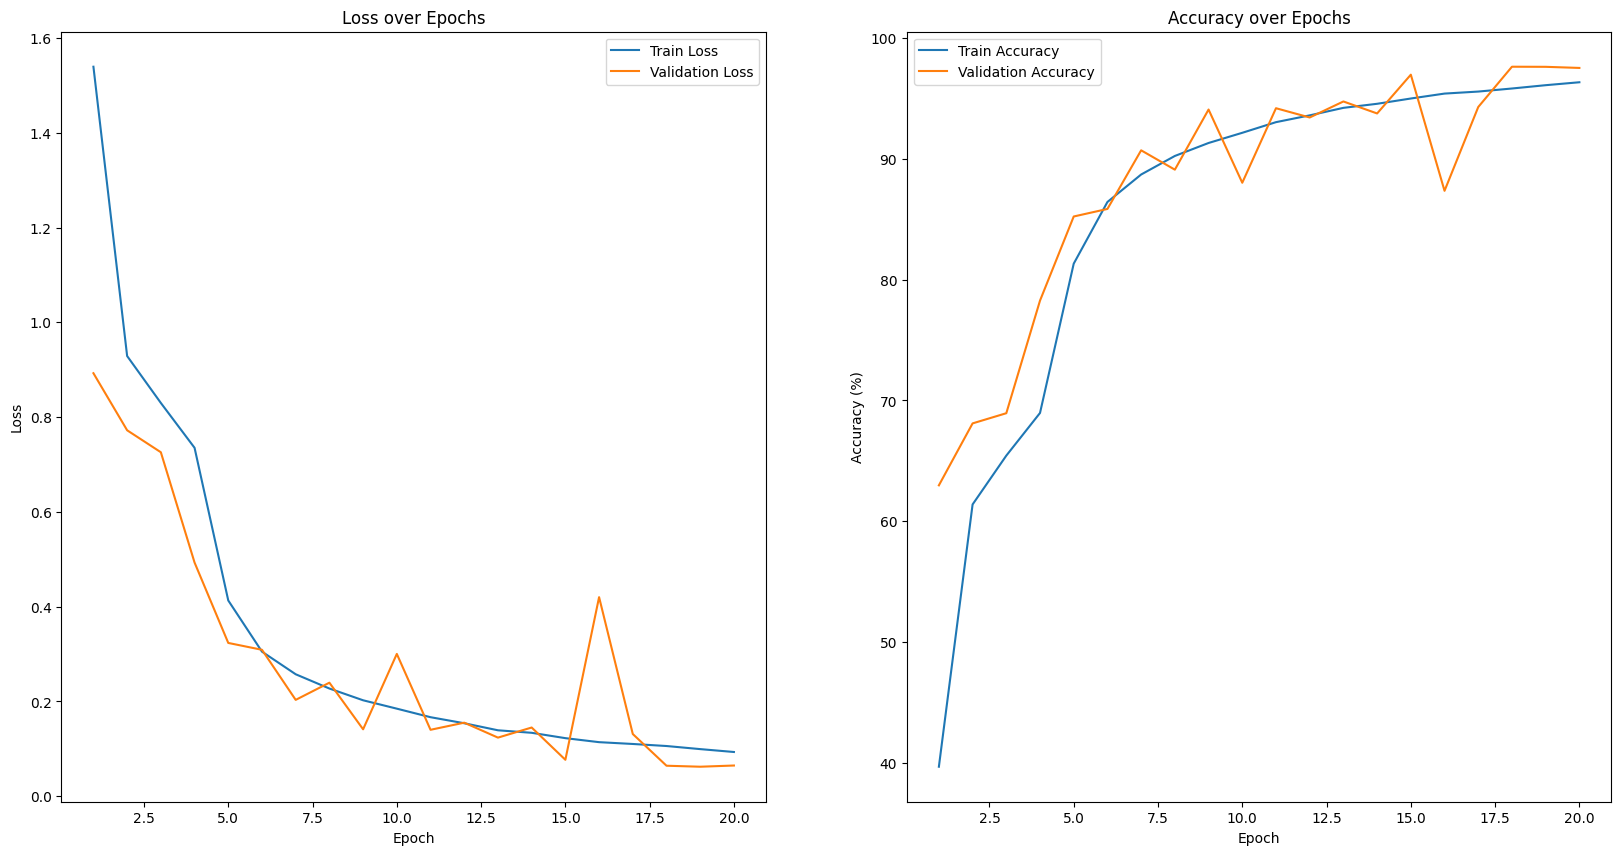

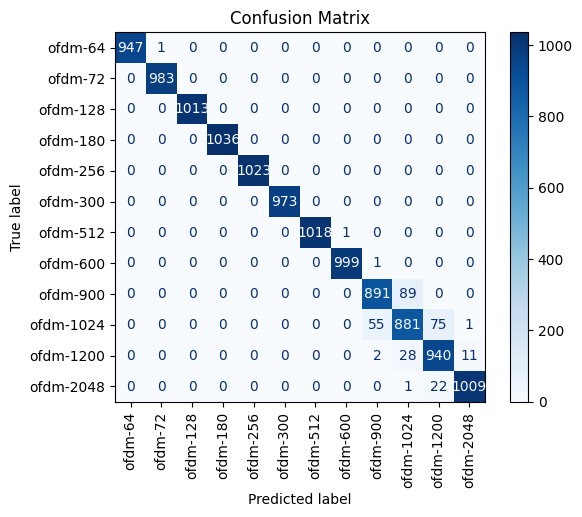

<Figure size 1000x1000 with 0 Axes>

In [18]:
# Evaluate the model
val_loss, val_accuracy, labels, predictions = evaluate_model(trainer.model, trainer.val_dataloader, trainer.criterion, trainer.device)

plot_metrics_and_confusion_matrix(trainer, labels, predictions, selected_classes)

The results are great for this version, the model now is able to differentiate between these classes we mentioend before, the overall accuracy is 97% on the test dataset 

Therefore the model will be saved for further use

In [23]:
torch.save(trainer.model.state_dict(), './models/ODFM_B2')